# PyPPSinflation notebook 5: plots

As explained in the fourth notebook of PyPPSinflation, this is a concise version of that notebook. Here, we repeat the comparison between the numerical and analytical solutions and produce the plots. This iteration is faster, and the plots are more refined for presentation.

In this notebook, we directly use the fitted numerical quantities as the effective numerical quantities and avoid recomputing the numerical solution. We use the previously computed PPS numerical values, and the coupling constants are already renormalized.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.integrate import odeint #This is a scipy package to solve ode.
from scipy.interpolate import interp1d, interp2d #We want to make an interpolation in order to have not a set of arrays but punctual functions.
from scipy import optimize #this is needed to find the roots of phi (in the case we want to use a script, but better to make it by hand)
from scipy.special import zeta, polygamma, factorial
from matplotlib.ticker import ScalarFormatter

In [2]:
#Defining model and its parameters.

#MODEL :   M^4 (1+mu/\phi)^-1 KKLT

Mpl=1
mu=1

m2an_s=(1.0000001483591165)**(1/2) * 1.733192366526448e-05
m2an_t=(1.0301918446183302)**(1/2) * 1.733192366526448e-05
m2an_s_noeps4 = (1.0000001523322612)**(1/2) * 1.7331925642516728e-05
m2num= (1.0313695717893807*1.000000134068844)**(1/2)*1.733192366526448e-05

In [3]:
#Interval of integration in k.

deltaN_star = 55
k_star= 0.05
k_num = 94
k_win = np.logspace(-5, 3, k_num)

In [4]:
# After athe analytical computations (see the 2nd notebook), we have the following epsilon_i for KKLT:


def eps1_LO(N):      
    eps1_LO = 8 * ( mu )**( 2 ) * ( ( ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + 
-1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 
) + mu * ( -1 + mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * 
mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 
1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 
12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( -1/3 ) ) 
) )**( -4 ) * ( ( 1 + 2 * mu * ( ( ( ( 12 * N * mu + ( ( ( 2 
)**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 
1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + 
-3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) 
) )**( 1/3 ) + mu * ( -1 + mu * ( ( 12 * N * mu + ( ( ( 2 )**( 
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * 
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) 
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) 
)**( -1/3 ) ) ) )**( -1 ) ) )**( -2 )
    return eps1_LO

def eps2_LO(N):
    eps2_LO = 32 * mu * ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * 
( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( 
mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * 
( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 
1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) * ( ( mu )**( 2 ) + ( ( 12 
* N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 
( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * N + 
( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) 
)**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) * ( ( ( mu )**( 2 ) + ( -1 
* mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( 
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu 
)**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 ) + ( ( 12 * N * 
mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 
)**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 
1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) 
)**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( -2 ) * ( ( ( mu )**( 2 ) + ( mu * 
( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 
) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 ) + ( ( 12 * N * mu 
+ ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 
1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 
) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) 
)**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( -2 )
    return eps2_LO

def eps3_LO(N):
    eps3_LO= -8 * mu * ( -12 * N * mu + ( -1 * ( 2 )**( 1/2 ) * mu * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( ( mu )**( 2 ) * ( mu * ( 2 * 
( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + -1 * ( 2 )**( 1/2 ) * ( ( mu )**( 
2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 
)**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) * ( ( ( mu )**( 2 ) 
+ ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * 
( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 
2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) )**( -1 ) * ( ( ( mu 
)**( 2 ) + ( -1 * mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 
* mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 
) + ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu 
)**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( -2 ) * ( ( 
( mu )**( 2 ) + ( mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 
* mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 
) + ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu 
)**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( -2 ) * ( 3 
* ( mu )**( 4 ) + ( 3 * mu * ( 12 * N + ( 2 )**( 1/2 ) * ( mu * 
( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) * ( ( 12 * N * mu + ( ( 
2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 
-1 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + 
( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * 
( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 
* mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) 
) ) ) )**( 1/3 ) + ( 3 * ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( 
N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( 2 )**( 
1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( -1 * ( 
mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 
)**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) 
) ) )**( 1/3 ) + -1 * ( mu )**( 2 ) * ( 3 * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( 2 )**( 1/2 ) * mu * 
( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) 
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( 
( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + 
-3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * 
( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 1/3 
) + -7 * ( ( 12 * N * mu + ( ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * 
( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) * ( mu * ( 2 
* ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) 
* ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu 
+ 12 * N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 
1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 2/3 ) ) ) ) )
    return eps3_LO

def eps4_LO(N):
    eps4_LO= -8 * ( mu )**( 2 ) * ( -12 * N * mu + ( -1 * ( 2 )**( 1/2 ) * 
mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( ( mu )**( 2 ) 
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + -1 * ( 2 )**( 1/2 ) 
* ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) 
+ -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) * ( ( ( 
mu )**( 2 ) + ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * 
mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * 
( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) )**( 
-1 ) * ( ( ( mu )**( 2 ) + ( -1 * mu * ( ( 12 * N * mu + ( ( ( 2 
)**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 
1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + 
-3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) 
) )**( 1/3 ) + ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) 
* mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) 
* ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( 
-2 ) * ( ( ( mu )**( 2 ) + ( mu * ( ( 12 * N * mu + ( ( ( 2 )**( 
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * 
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) 
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) 
)**( 1/3 ) + ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * 
mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * 
( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) ) )**( 
-2 ) * ( 12672 * ( N )**( 2 ) * ( mu )**( 3 ) + ( 352 * ( 2 )**( 
1/2 ) * ( mu )**( 4 ) + ( -528 * ( mu )**( 5 ) + ( 53 * ( mu )**( 7 ) 
+ ( 2112 * ( 2 )**( 1/2 ) * N * ( mu )**( 3 ) * ( mu * ( 2 * ( 2 
)**( 1/2 ) + mu ) )**( 1/2 ) + ( -2112 * N * ( mu )**( 4 ) * ( 
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 1056 * ( 2 )**( 1/2 ) 
* N * ( mu )**( 2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) 
+ ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 
1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) 
)**( 1/2 ) + ( 176 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu 
) )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 
2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) + 
( -88 * ( 2 )**( 1/2 ) * ( mu )**( 3 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) 
+ mu ) )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 
2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) 
+ -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 
1/2 ) + ( 828 * N * ( mu )**( 4 ) * ( ( 12 * N * mu + ( ( ( 
2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) 
)**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 
) + -3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + 
-1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 
1/2 ) ) ) )**( 1/3 ) + ( 69 * ( 2 )**( 1/2 ) * ( mu )**( 4 ) * ( mu * 
( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( ( 
2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) 
)**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 
) + -3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + 
-1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 
1/2 ) ) ) )**( 1/3 ) + ( -69 * ( mu )**( 5 ) * ( mu * ( 2 * ( 2 )**( 
1/2 ) + mu ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + 
-1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 1/3 
) + ( 69 * ( 2 )**( 1/2 ) * ( mu )**( 3 ) * ( ( mu )**( 2 ) * ( 72 * 
( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( ( 2 )**( 
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * 
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) 
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) 
)**( 1/3 ) + ( 2592 * ( N )**( 2 ) * mu * ( ( 12 * N * mu + 
( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 
1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 
) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) 
)**( 1/2 ) ) ) )**( 2/3 ) + ( 72 * ( 2 )**( 1/2 ) * ( mu )**( 2 ) * ( 
( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 
* ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) 
* ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( -108 * ( mu )**( 3 
) * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu 
)**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( 53 * ( mu )**( 
5 ) * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( 
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu 
)**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 
) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( 432 * ( 2 )**( 
1/2 ) * N * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) * 
( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 
) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( -432 * N * ( 
mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) * ( ( 12 
* N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 
( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * N + 
( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) 
)**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( 216 * ( 2 )**( 1/2 ) * 
N * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 
)**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) * 
( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 
) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) + ( 36 * ( mu * ( 2 * ( 
2 )**( 1/2 ) + mu ) )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N 
)**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 
( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 
1/2 ) ) ) )**( 1/2 ) * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 
* mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * 
mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu 
* ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 
) + -18 * ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) 
)**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 
)**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * 
mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) * 
( ( 12 * N * mu + ( ( ( 2 )**( 1/2 ) + -1 * mu ) * mu * ( mu * ( 
2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 
) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * N * ( 6 * 
N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( 2/3 ) ) ) ) ) ) ) ) ) ) ) ) ) 
) ) ) ) ) ) ) ) ) * ( ( 3 * ( mu )**( 4 ) + ( 3 * mu * ( 12 * N 
+ ( 2 )**( 1/2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) * 
( ( 12 * N * mu + ( ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 
1/2 ) + mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 
)**( 1/2 ) + mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 
72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 
* N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) 
+ mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 1/3 ) + ( 3 * ( 2 )**( 
1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( N )**( 2 ) + ( ( 2 * ( 2 )**( 
1/2 ) + -3 * mu ) * mu + 12 * N * ( ( 2 )**( 1/2 ) + -1 * mu ) * 
( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) * ( ( 12 
* N * mu + ( ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) 
+ mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( 
N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 1/3 ) + -1 * ( mu )**( 2 ) 
* ( 3 * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) * ( ( 12 * 
N * mu + ( ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) 
+ mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( 
N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 1/3 ) + -7 * ( ( 12 * 
N * mu + ( ( 2 )**( 1/2 ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) + ( -1 * ( mu )**( 2 ) * ( mu * ( 2 * ( 2 )**( 1/2 ) 
+ mu ) )**( 1/2 ) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( 72 * ( 
N )**( 2 ) + ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) * mu + 12 * 
N * ( ( 2 )**( 1/2 ) + -1 * mu ) * ( mu * ( 2 * ( 2 )**( 1/2 ) + 
mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) ) )**( 2/3 ) ) ) ) ) )**( -1 )
    return eps4_LO



#Comment if you want eps4_LO(N) equal to 0
#def eps4_LO(N):
#    eps4_LO=0 
#    return eps4_LO


def eps5_LO(N):
    eps5_LO=0 
    return eps5_LO

In [5]:
#Referining the slow roll parameters at 3NLO with respect to the computed HFF at LO

def eps1(N):      
    eps1 = eps1_LO(N) - 1/3 * eps1_LO(N) * eps2_LO(N) - 1/9 * eps1_LO(N)**2 * eps2_LO(N) + 5/36 * eps1_LO(N) * eps2_LO(N)**2 + 1/9 * eps1_LO(N) * eps2_LO(N) * eps3_LO(N)
    return eps1

def eps2(N):      
    eps2 = eps2_LO(N) - 1/6 * eps2_LO(N)**2 - 1/3 * eps2_LO(N) * eps3_LO(N) - 1/6 * eps1_LO(N) * eps2_LO(N)**2 + 1/18 * eps2_LO(N)**3 - 1/9 * eps1_LO(N) * eps2_LO(N) * eps3_LO(N) + 5/18 * eps2_LO(N)**2 * eps3_LO(N) + 1/9 * eps2_LO(N) * eps3_LO(N)**2 + 1/9 * eps2_LO(N) * eps3_LO(N) * eps4_LO(N)
    return eps2

def eps3(N):      
    eps3 = eps3_LO(N) - 1/3 * eps2_LO(N) * eps3_LO(N) - 1/3 * eps3_LO(N) * eps4_LO(N) - 1/6 * eps1_LO(N) * eps2_LO(N)**2 - 1/3 * eps1_LO(N) * eps2_LO(N) * eps3_LO(N) + 1/6 * eps2_LO(N)**2 * eps3_LO(N) + 5/18 * eps2_LO(N) * eps3_LO(N)**2 - 1/9 * eps1_LO(N) * eps3_LO(N) * eps4_LO(N) + 5/18 * eps2_LO(N) * eps3_LO(N) * eps4_LO(N) + 1/9 * eps3_LO(N)**2 * eps4_LO(N) + 1/9 * eps3_LO(N) * eps4_LO(N)**2 + 1/9 * eps3_LO(N) * eps4_LO(N) * eps5_LO(N)
    return eps3

def eps4(N):      
    eps4 = eps4_LO(N) - 1/3 * eps2_LO(N) * eps3_LO(N) - 1/6 * eps2_LO(N) * eps4_LO(N) - 1/3 * eps4_LO(N) * eps5_LO(N)
    return eps4

In [6]:
#Defining the Hubble function at the first order, second, and third-order (it is always the same)

def H_sq1(mass,N):
    H_sq = 1/3 * (mass)**2 * ( ( 1 + 2 * mu * ( ( ( ( 12 * N * mu + ( ( ( 2 )**( \
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 \
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * \
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) \
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) \
)**( 1/3 ) + mu * ( -1 + mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 \
) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + \
( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) \
* mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( \
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( \
-1/3 ) ) ) )**( -1 ) ) )**( -1 )
    return H_sq

def H_sq2(mass,N):
    H_sq2 = 1/3 * (mass)**2 * ( ( 1 + 2 * mu * ( ( ( ( 12 * N * mu + ( ( ( 2 )**( \
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 \
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * \
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) \
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) \
)**( 1/3 ) + mu * ( -1 + mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 \
) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + \
( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) \
* mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( \
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( \
-1/3 ) ) ) )**( -1 ) ) )**( -1 )
    return H_sq2

def H_sq3(mass,N):
    H_sq3 = 1/3 * (mass)**2 * ( ( 1 + 2 * mu * ( ( ( ( 12 * N * mu + ( ( ( 2 )**( \
1/2 ) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 \
) + ( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * \
mu ) * mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) \
* ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) \
)**( 1/3 ) + mu * ( -1 + mu * ( ( 12 * N * mu + ( ( ( 2 )**( 1/2 \
) + -1 * mu ) * mu * ( mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) + \
( 2 )**( 1/2 ) * ( ( mu )**( 2 ) * ( ( 2 * ( 2 )**( 1/2 ) + -3 * mu ) \
* mu + 12 * N * ( 6 * N + ( ( 2 )**( 1/2 ) + -1 * mu ) * ( \
mu * ( 2 * ( 2 )**( 1/2 ) + mu ) )**( 1/2 ) ) ) )**( 1/2 ) ) ) )**( \
-1/3 ) ) ) )**( -1 ) ) )**( -1 )
    return H_sq3

In [7]:
#Defining the P0s at the first, second, and third-order (they are always the same)

P0_s1 = H_sq1(m2an_s,deltaN_star)/(8*np.pi**2 * Mpl**2 *  eps1(deltaN_star))

P0_t1 = 2*H_sq1(m2an_t,deltaN_star)/(np.pi**2 * Mpl**2)

P0_s2 = H_sq2(m2an_s,deltaN_star)/(8*np.pi**2 * Mpl**2 *  eps1(deltaN_star))

P0_t2 = 2*H_sq2(m2an_t, deltaN_star)/(np.pi**2 * Mpl**2)

P0_s3 = H_sq3(m2an_s,deltaN_star)/(8*np.pi**2 * Mpl**2 *  eps1(deltaN_star))

P0_s3_noep4 = H_sq3(m2an_s_noeps4,deltaN_star)/(8*np.pi**2 * Mpl**2 *  eps1(deltaN_star))

P0_t3 = 2*H_sq3(m2an_t, deltaN_star)/(np.pi**2 * Mpl**2)

In [8]:
#Defining the b parameters at first, second, and third-order 

C = -0.7296

def bs01(N):
    return -2*(C+1)*eps1(N) - C*eps2(N)

def bs11(N):
    return -2*eps1(N) - eps2(N) 

def bs21(N):
    return 0

def bt01(N): 
    return -2*(C+1)*eps1(N)

def bt11(N):
    return -2*eps1(N)

def bt21(N):
    return 0

def bs02(N): 
    return -2*(C+1)*eps1(N) - C*eps2(N) + (-2*C + 0.5*np.pi**2 -7)*eps1(N)**2 + (-C**2 - 3*C + 7/12* np.pi**2 -7)*eps1(N)*eps2(N) + ( np.pi**2/8 -1)*eps2(N)**2 + (-0.5*C**2 + np.pi**2/24)*eps2(N)*eps3(N)

def bs12(N): 
    return -2*eps1(N) - eps2(N) + -2*eps1(N)**2 - (2*C+3)*eps1(N)*eps2(N)  - C*eps2(N)*eps3(N)

def bs22(N):
    return -2*eps1(N)*eps2(N)-eps2(N)*eps3(N)

def bt02(N):
    return -2*(C+1)*eps1(N) + (-2*C + 0.5*np.pi**2 -7)*eps1(N)**2 + (-C**2 -2*C + np.pi**2/12 -2)*eps1(N)*eps2(N)

def bt12(N):
    return -2*eps1(N) -2*eps1(N)**2- 2*(C+1)*eps1(N)*eps2(N)

def bt22(N):
    return   - 2*eps1(N)*eps2(N)

def bs03(N, e4=True):
    if e4:
        epsi4 = eps4(N)
    else:
        epsi4=0
    return (-2 * (1 + C) * eps1(N) + (-5 - 2 * C + (np.pi**2) / 2) * eps1(N)**2 - C * eps2(N) + (-6 - 3 * C - C**2 + (7 * np.pi**2) / 12) * eps1(N) * eps2(N)+ (1 / 24) * (-12 * C**2 + np.pi**2) * eps2(N) * eps3(N) - (1 / 24) * (80 + 48 * C - 24 * np.pi**2 + 112 * zeta(3)) * eps1(N)**3 + (1 / 8) * (-8 + np.pi**2) * eps2(N)**2  - (1 / 24) * (-16 + 14 * zeta(3)) * eps2(N)**3 + (1 / 12) * (-144 - 180 * C - 36 * C**2 + 27 * np.pi**2 + 12 * C * np.pi**2 - 84 * zeta(3)) * eps1(N)**2 * eps2(N)- (1 / 24) * (64 + 168 * C + 36 * C**2 + 8 * C**3 - 21 * np.pi**2 - 14 * C * np.pi**2 + 100 * zeta(3)) * eps1(N) * eps2(N)**2+ (1 / 24) * (16 - 4 * C**3 + C * np.pi**2 - 8 * zeta(3)) * (eps2(N) * eps3(N)**2 + eps2(N) * eps3(N) * epsi4)  + (1 / 24) * (-48 * C + 6 * C * np.pi**2) * eps2(N)**2 * eps3(N)+ (1 / 12) * (-8 - 72 * C - 24 * C**2 - 4 * C**3 + 2 * np.pi**2 + 7 * C * np.pi**2 - 8 * zeta(3)) * eps1(N) * eps2(N) * eps3(N))


def bs13(N, e4=True):
    if e4:
        epsi4 = eps4(N)
    else:
        epsi4=0
    return (-2 * eps1(N) - 2 * eps1(N)**2 - 2 * eps1(N)**3 - eps2(N) - (3 + 2 * C) * eps1(N) * eps2(N) - C * eps2(N) * eps3(N) - (2 / 3) * (45 / 2 + 9 * C - 3 * np.pi**2 / 2) * eps1(N)**2 * eps2(N)- (1 / 4) * (28 + 12 * C + 4 * C**2 - 7 * np.pi**2 / 3) * eps1(N) * eps2(N)**2 + (1 / 2) * (-12 - 8 * C - 2 * C**2 + 7 * np.pi**2 / 6) * eps1(N) * eps2(N) * eps3(N)+ (1 / 24) * (-12 * C**2 + np.pi**2) * (eps2(N) * eps3(N)**2 + eps2(N) * eps3(N) * epsi4) + (1 / 24) * (-48 + 6 * np.pi**2) * eps2(N)**2 * eps3(N))


def bs23(N, e4=True):
    if e4:
        epsi4 = eps4(N)
    else:
        epsi4=0
    return (-2 * eps1(N) * eps2(N) - 6 * eps1(N)**2 * eps2(N) - (3 + 2 * C) * eps1(N) * eps2(N)**2 - eps2(N) * eps3(N)- 2 * (2 + C) * eps1(N) * eps2(N) * eps3(N) - C * eps2(N) * eps3(N)**2 - C * eps2(N) * eps3(N) * epsi4)


def bs33(N, e4=True):
    if e4:
        epsi4 = eps4(N)
    else:
        epsi4=0
    return  (-2 * eps1(N) * eps2(N)**2 - 2 * eps1(N) * eps2(N) * eps3(N) - eps2(N) * eps3(N)**2 - eps2(N) * eps3(N) * epsi4)


def bt03(N):
    return (-2 * (1 + C) * eps1(N) + (1 / 2) * (-10 - 4 * C + np.pi**2) * eps1(N)**2  + (1 / 12) * (-24 - 24 * C - 12 * C**2 + np.pi**2) * eps1(N) * eps2(N) - (1 / 3) * (10 + 6 * C - 3 * np.pi**2 + 14 * zeta(3)) * eps1(N)**3  + (1 / 12) * (-144 - 168 * C - 36 * C**2 + 15 * np.pi**2 + 12 * C * np.pi**2) * eps1(N)**2 * eps2(N) - (1 / 12) * (8 + 24 * C + 12 * C**2 + 4 * C**3 - np.pi**2 - C * np.pi**2 + 8 * zeta(3)) * (eps1(N) * eps2(N)**2 + eps1(N) * eps2(N) * eps3(N)))


def bt13(N):
    return (-2 * eps1(N) - 2 * eps1(N)**2 + (-2 - 2 * C) * eps1(N) * eps2(N) - 2 * eps1(N)**3  + (1 / 6) * (-84 - 36 * C + 6 * np.pi**2) * eps1(N)**2 * eps2(N) + (1 / 12) * (-24 - 24 * C - 12 * C**2 + np.pi**2) * (eps1(N) * eps2(N)**2 + eps1(N) * eps2(N) * eps3(N)))


def bt23(N):
    return (-2 * eps1(N) * eps2(N) - 6 * eps1(N)**2 * eps2(N) - 2 * (1 + C) * eps1(N) * eps2(N)**2 - 2 * (1 + C) * eps1(N) * eps2(N) * eps3(N))

def bt33(N):
    return (-2 * eps1(N) * eps2(N)**2 - 2 * eps1(N) * eps2(N) * eps3(N))

In [9]:
#Scalar PPS at first, second, and third-order:

def loggPS_s1(ka):
    log = np.log(ka/k_star)
    loggPS_s_val1 = P0_s1*np.exp((bs01(deltaN_star) + bs11(deltaN_star)*log))
    return loggPS_s_val1

def loggPS_s2(ka): 
    log = np.log(ka/k_star)
    log_sq = log**2
    loggPS_s_val2  = P0_s2*np.exp((bs02(deltaN_star) + bs12(deltaN_star)*log + 0.5*bs22(deltaN_star)*log_sq))
    return loggPS_s_val2

def loggPS_s3(ka): 
    log = np.log(ka/k_star)
    log_sq = log**2
    log_cub = log**3
    loggPS_s_val3  = P0_s3*np.exp((bs03(deltaN_star) + bs13(deltaN_star)*log + 0.5*bs23(deltaN_star)*log_sq+(1/6)*bs33(deltaN_star)*log_cub))
    return loggPS_s_val3

def loggPS_s3_noeps4(ka): 
    log = np.log(ka/k_star)
    log_sq = log**2
    log_cub = log**3
    loggPS_s_val3  = P0_s3_noep4*np.exp((bs03(deltaN_star, False) + bs13(deltaN_star, False)*log + 0.5*bs23(deltaN_star, False)*log_sq+(1/6)*bs33(deltaN_star, False)*log_cub))
    return loggPS_s_val3

#Tensor PPS at first, second, and third-order:

def loggPS_t1(ka):
    log = np.log(ka/k_star)
    log_sq = log**2
    loggPS_t_val1  = P0_t1*np.exp((bt01(deltaN_star) + bt11(deltaN_star)*log))
    return loggPS_t_val1

def loggPS_t2(ka):
    log = np.log(ka/k_star)
    log_sq = log**2
    loggPS_t_val2  = P0_t2*np.exp((bt02(deltaN_star) + bt12(deltaN_star)*log + 0.5*bt22(deltaN_star)*log_sq))
    return loggPS_t_val2

def loggPS_t3(ka):
    log = np.log(ka/k_star)
    log_sq = log**2
    log_cub = log**3
    loggPS_t_val3  = P0_t2*np.exp((bt03(deltaN_star) + bt13(deltaN_star)*log + 0.5*bt23(deltaN_star)*log_sq+(1/6)*bt33(deltaN_star)*log_cub))
    return loggPS_t_val3

In [10]:
#Numerical (already computed in PyPPSinflation notebook 4 with the right normalization / coupling constant)

PSs_num = ([2.43992429e-09, 2.42943726e-09, 2.41896119e-09, 2.40849825e-09,
       2.39801142e-09, 2.38757335e-09, 2.37714690e-09, 2.36673390e-09,
       2.35629707e-09, 2.34590873e-09, 2.33553177e-09, 2.32513296e-09,
       2.31478239e-09, 2.30444455e-09, 2.29411801e-09, 2.28376923e-09,
       2.27346873e-09, 2.26318164e-09, 2.25290575e-09, 2.24260848e-09,
       2.23235996e-09, 2.22212293e-09, 2.21189825e-09, 2.20165344e-09,
       2.19145375e-09, 2.18126803e-09, 2.17109525e-09, 2.16090283e-09,
       2.15075543e-09, 2.14062203e-09, 2.13050166e-09, 2.12036098e-09,
       2.11026694e-09, 2.10018522e-09, 2.09011700e-09, 2.08002923e-09,
       2.06998778e-09, 2.05995858e-09, 2.04991186e-09, 2.03991019e-09,
       2.02992140e-09, 2.01994541e-09, 2.00995307e-09, 2.00000503e-09,
       1.99006972e-09, 1.98014820e-09, 1.97020977e-09, 1.96031519e-09,
       1.95043365e-09, 1.94056623e-09, 1.93068219e-09, 1.92084416e-09,
       1.91101644e-09, 1.90117472e-09, 1.89137668e-09, 1.88159263e-09,
       1.87182218e-09, 1.86203425e-09, 1.85229142e-09, 1.84256345e-09,
       1.83281868e-09, 1.82311818e-09, 1.81343106e-09, 1.80375743e-09,
       1.79407160e-09, 1.78442681e-09, 1.77479756e-09, 1.76517971e-09,
       1.75555036e-09, 1.74596226e-09, 1.73638862e-09, 1.72680439e-09,
       1.71726001e-09, 1.70772780e-09, 1.69819815e-09, 1.68866576e-09,
       1.67917493e-09, 1.66970344e-09, 1.66021589e-09, 1.65077052e-09,
       1.64134017e-09, 1.63192608e-09, 1.62250254e-09, 1.61311934e-09,
       1.60376230e-09, 1.59437150e-09, 1.58503099e-09, 1.57571294e-09,
       1.56636974e-09, 1.55708062e-09, 1.54779365e-09, 1.53853514e-09,
       1.52926661e-09, 1.52003210e-09])

#PS_num = 1e9*PSs_num_raw

PSs_interp_num = interp1d(k_win, PSs_num, kind='linear')

PSt_num = ([1.75844225e-11, 1.75812787e-11, 1.75781190e-11, 1.75749412e-11,
       1.75715009e-11, 1.75682959e-11, 1.75650873e-11, 1.75618562e-11,
       1.75583634e-11, 1.75551053e-11, 1.75518416e-11, 1.75482995e-11,
       1.75450085e-11, 1.75416981e-11, 1.75383799e-11, 1.75347779e-11,
       1.75314306e-11, 1.75280716e-11, 1.75246902e-11, 1.75210321e-11,
       1.75176302e-11, 1.75142039e-11, 1.75107668e-11, 1.75070535e-11,
       1.75035845e-11, 1.75000997e-11, 1.74965959e-11, 1.74928257e-11,
       1.74892985e-11, 1.74857545e-11, 1.74821921e-11, 1.74783477e-11,
       1.74747590e-11, 1.74711508e-11, 1.74675210e-11, 1.74636250e-11,
       1.74599653e-11, 1.74562874e-11, 1.74523388e-11, 1.74486300e-11,
       1.74449030e-11, 1.74411582e-11, 1.74371344e-11, 1.74333589e-11,
       1.74295573e-11, 1.74257369e-11, 1.74216539e-11, 1.74178077e-11,
       1.74139298e-11, 1.74100372e-11, 1.74058791e-11, 1.74019588e-11,
       1.73980147e-11, 1.73937822e-11, 1.73898041e-11, 1.73858046e-11,
       1.73817770e-11, 1.73774822e-11, 1.73734121e-11, 1.73693319e-11,
       1.73649749e-11, 1.73608457e-11, 1.73567081e-11, 1.73525420e-11,
       1.73481003e-11, 1.73438834e-11, 1.73396683e-11, 1.73354083e-11,
       1.73308762e-11, 1.73265820e-11, 1.73222620e-11, 1.73176742e-11,
       1.73133022e-11, 1.73088992e-11, 1.73044377e-11, 1.72995918e-11,
       1.72950943e-11, 1.72906167e-11, 1.72857913e-11, 1.72812627e-11,
       1.72766570e-11, 1.72720587e-11, 1.72672217e-11, 1.72625999e-11,
       1.72581221e-11, 1.72529777e-11, 1.72482694e-11, 1.72436395e-11,
       1.72384771e-11, 1.72337142e-11, 1.72288200e-11, 1.72239970e-11,
       1.72188805e-11, 1.72139570e-11])


#PSt_num = 1e11*PSt_num_raw
PSt_interp_num = interp1d(k_win, PSt_num, kind='linear')


In [11]:
# In the case the numerical spectrum oscillates too much you can make a fit of it and use the fit. 
#Here for instance the case the error num vs ana oscillates too much for the tensor PS. 

PSt_fitting_params3 = np.polyfit (np.log(k_win/k_star), PSt_num,3, rcond=None, full=False, w=None, cov=False)
PSt_fitted3=+PSt_fitting_params3[0]*np.log(k_win/k_star)**3+PSt_fitting_params3[1]*np.log(k_win/k_star)**2+PSt_fitting_params3[2]*np.log(k_win/k_star) +PSt_fitting_params3[3]

In [12]:
# Use the PS interpolated or the fitted one 

error_s1 = ((loggPS_s1(k_win))/PSs_interp_num(k_win) -1 )*100

error_s2 = ((loggPS_s2(k_win))/ PSs_interp_num(k_win) -1 )*100

error_s3 = ((loggPS_s3(k_win))/ PSs_interp_num(k_win) -1 )*100

error_s3_noeps4 = ((loggPS_s3_noeps4(k_win))/ PSs_interp_num(k_win) -1 )*100

#error_t1 = ((loggPS_t1(k_win))/PSt_interp_num(k_win) -1 )*100

#error_t2 = ((loggPS_t2(k_win))/PSt_interp_num(k_win)  -1 )*100

#error_t3 = ((loggPS_t3(k_win))/PSt_interp_num(k_win)  -1 )*100

error_t1 = ((loggPS_t1(k_win))/PSt_fitted3 -1 )*100

error_t2 = ((loggPS_t2(k_win))/PSt_fitted3  -1 )*100

error_t3 = ((loggPS_t3(k_win))/PSt_fitted3  -1 )*100

In [13]:
#analytical n_S and n_T
def n_s2_ana(ka): 
    log = np.log(ka/k_star)
    n_s2_value = 1+bs12(deltaN_star)+  bs22(deltaN_star)*log
    return n_s2_value

def n_t2_ana(ka): 
    log = np.log(ka/k_star)
    n_t2_value = bt12(deltaN_star)+  bt22(deltaN_star)*log
    return n_t2_value

def n_s3_ana(ka): 
    log = np.log(ka/k_star)
    log_sq= log**2
    n_s3_value = 1+bs13(deltaN_star)+  bs23(deltaN_star)*log + 0.5*bs33(deltaN_star)*log**2 
    return n_s3_value

def n_s3_ana_noeps4(ka): 
    log = np.log(ka/k_star)
    log_sq= log**2
    n_s3_value = 1+bs13(deltaN_star, False)+  bs23(deltaN_star, False)*log + 0.5*bs33(deltaN_star, False)*log**2 
    return n_s3_value

def n_t3_ana(ka): 
    log = np.log(ka/k_star)
    log_sq= log**2
    n_t3_value = bt13(deltaN_star)+  bt23(deltaN_star)*log + 0.5*bt33(deltaN_star)*log**2 
    return n_t3_value

In [14]:
#n_S and n_T numerical

#PPS and their logarithms
logPS = np.log(PSs_num)
logPT = np.log(PSt_num)
lnk=np.log(k_win/k_star)

#Spectral indices
n_S =1+ np.gradient(logPS, lnk)
n_T = np.gradient(logPT, lnk)


#Fitting using the fitted parameters (computed in PyPPSinflation notobook 4)
n_S_fitting_params=  [-1.43160168e-07, -8.56625800e-06, -4.59839215e-04,  9.74883461e-01]
n_T_fitting_params= [-1.51346354e-08, -6.15233933e-07, -2.77128280e-05, -1.11791897e-03]


n_S_fitted=+n_S_fitting_params[0]*np.log(k_win/k_star)**3+n_S_fitting_params[1]*np.log(k_win/k_star)**2+n_S_fitting_params[2]*np.log(k_win/k_star) +n_S_fitting_params[3]
n_T_fitted=+n_T_fitting_params[0]*np.log(k_win/k_star)**3+n_T_fitting_params[1]*np.log(k_win/k_star)**2+n_T_fitting_params[2] *np.log(k_win/k_star) +n_T_fitting_params[3]

In [15]:
#alpha_S and alpha_T analytical

def alpha_s3_ana(ka): 
    log = np.log(ka/k_star)
    alpha_s3_value = bs23(deltaN_star) + bs33(deltaN_star)*log 
    return alpha_s3_value

def alpha_s3_ana_noeps4(ka): 
    log = np.log(ka/k_star)
    alpha_s3_value = bs23(deltaN_star, False) + bs33(deltaN_star, False)*log 
    return alpha_s3_value

def alpha_t3_ana(ka): 
    log = np.log(ka/k_star)
    alpha_t3_value = bt23(deltaN_star) + bt33(deltaN_star)*log
    return alpha_t3_value

In [16]:
#alpha_S and alpha_T numerical

alpha_S = np.gradient(n_S, lnk)
alpha_T = np.gradient(n_T, lnk)
alpha_S_fitted = np.gradient(n_S_fitted, lnk)
alpha_T_fitted = np.gradient(n_T_fitted, lnk)

In [17]:
#beta_S and beta_T 

beta_S = np.gradient(alpha_S, lnk)
beta_T = np.gradient(alpha_T, lnk)

beta_S_fitted = np.gradient(alpha_S_fitted, lnk)
beta_T_fitted = np.gradient(alpha_T_fitted, lnk)

beta_S_interp = interp1d(k_win,beta_S_fitted, kind='linear')
beta_T_interp = interp1d(k_win, beta_T_fitted, kind='linear')


In [18]:
#Errors in %

ratio_nS_2 =(1-n_S / n_s2_ana(k_win))*100

ratio_nS_3 =(1- n_S / n_s3_ana(k_win))*100

ratio_nS_3_noeps4 =(1- n_S / n_s3_ana_noeps4(k_win))*100

ratio_nS_1_fit=(1- n_S_fitted /(1+bs11(deltaN_star)))*100

ratio_nS_2_fit =(1- n_S_fitted / n_s2_ana(k_win))*100

ratio_nS_3_fit = (1-n_S_fitted / n_s3_ana(k_win))*100

ratio_nS_3_fit_noeps4 = (1-n_S_fitted / n_s3_ana_noeps4(k_win))*100

ratio_nT_2 = (1-n_T / n_t2_ana(k_win))*100

ratio_nT_3 = (1- n_T / n_t3_ana(k_win))*100

ratio_nT_1_fit=(1- n_T_fitted /(bt11(deltaN_star)))*100

ratio_nT_2_fit = (1-n_T_fitted / n_t2_ana(k_win))*100

ratio_nT_3_fit = (1-n_T_fitted / n_t3_ana(k_win))*100




ratio_alphaS_2 =(1- alpha_S/bs22(deltaN_star))*100

ratio_alphaS_3 =(1- alpha_S/alpha_s3_ana(k_win))*100

ratio_alphaS_3_noeps4 =(1- alpha_S/alpha_s3_ana_noeps4(k_win))*100

ratio_alphaS_2_fit =(1- alpha_S_fitted / bs22(deltaN_star))*100

ratio_alphaS_3_fit =(1- alpha_S_fitted / alpha_s3_ana(k_win))*100

ratio_alphaS_3_fit_noeps4 =(1- alpha_S_fitted / alpha_s3_ana_noeps4(k_win))*100

ratio_alphaT_2 = (1-alpha_T/bt22(deltaN_star))*100

ratio_alphaT_3 = (1-alpha_T/alpha_t3_ana(k_win))*100

ratio_alphaT_2_fit = (1-alpha_T_fitted / bt22(deltaN_star))*100

ratio_alphaT_3_fit = (1-alpha_T_fitted / alpha_t3_ana(k_win))*100


ratio_betaS = (1-beta_S_fitted/bs33(deltaN_star))*100
ratio_betaS_noeps4 = (1-beta_S_fitted/bs33(deltaN_star, False))*100
ratio_betaT = (1-beta_T_fitted/bt33(deltaN_star))*100

## Plots

Text(0.5, 0, '$k\\, \\ [{\\rm Mpc^{-1}}]$')

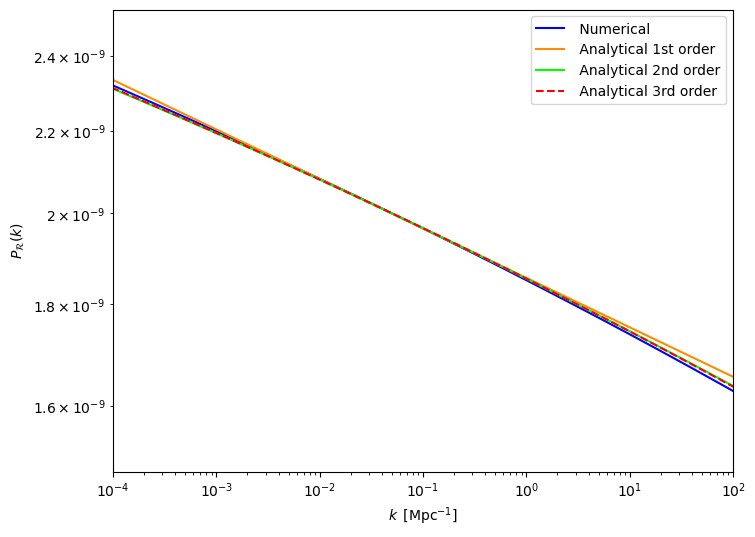

In [19]:
#Scalar PPS comparison

plt.figure(figsize=(8,6))
plt.loglog(k_win, PSs_interp_num(k_win), color="blue", label=" Numerical")
plt.loglog(k_win, loggPS_s1(k_win), color="darkorange", label = " Analytical 1st order")
plt.loglog(k_win, loggPS_s2(k_win), color="lime", label = " Analytical 2nd order")
plt.loglog(k_win, loggPS_s3(k_win), color="red", ls="--", label = " Analytical 3rd order")
plt.xlim([10**(-4), 1e2])
plt.legend()
plt.ylabel(r'$P_{\cal R}(k)$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#plt.savefig("Scalar_PSS.pdf", format="pdf", dpi=400)

Text(0.5, 0, '$k\\, \\ [{\\rm Mpc^{-1}}]$')

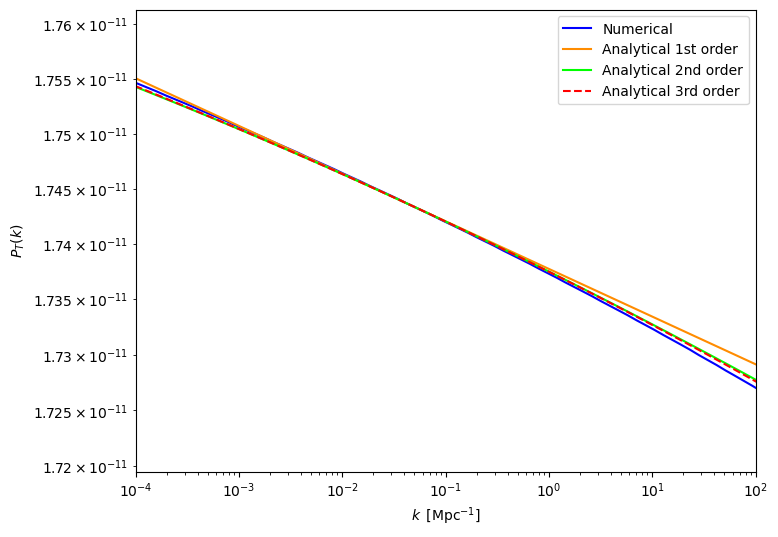

In [20]:
#Tensor PPS comparison

plt.figure(figsize=(8,6))
plt.loglog(k_win, PSt_interp_num(k_win) ,color="blue", label='Numerical')
plt.loglog(k_win, loggPS_t1(k_win), color="darkorange", label = "Analytical 1st order")
plt.loglog(k_win, loggPS_t2(k_win),color="lime",label = "Analytical 2nd order")
plt.loglog(k_win, loggPS_t3(k_win),color="red", ls="--", label = "Analytical 3rd order")
plt.xlim([10**(-4), 1e2])
plt.legend()
plt.xscale('log')
plt.ylabel(r'$P_{T}(k)$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#plt.savefig("Tensor_PSS.pdf", format="pdf", dpi=400)

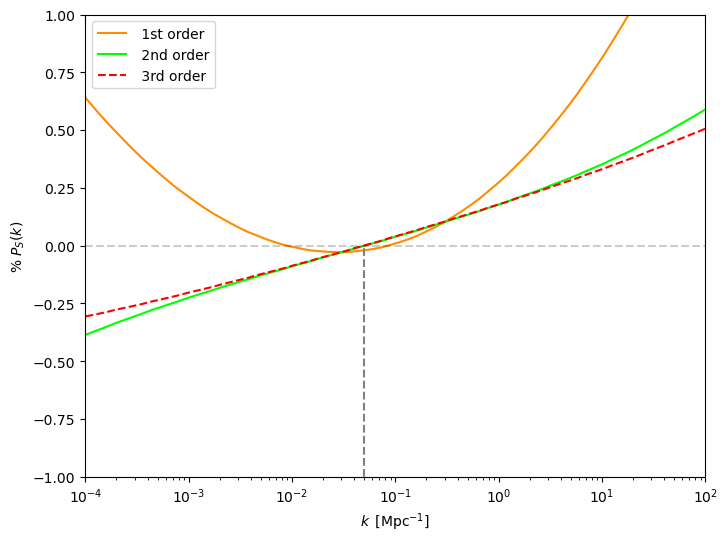

In [21]:
#Scalar PPS percentage errors

plt.figure(figsize=(8,6))
plt.plot(k_win, error_s1,color="darkorange", label = " 1st order")
plt.plot(k_win, error_s2,color="lime",label = " 2nd order")
plt.plot(k_win, error_s3,color="red",ls="--",label = " 3rd order")
plt.vlines(x = k_star,ymin= -10, ymax=0 , color = 'gray', ls="--")
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
plt.xscale('log')
plt.ylim([-1, +1])
plt.xlim([10**(-4), 1e2])
plt.ylabel(r'% $P_S(k)$ ')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("Error_scalar_PSS.pdf", format="pdf", dpi=400)

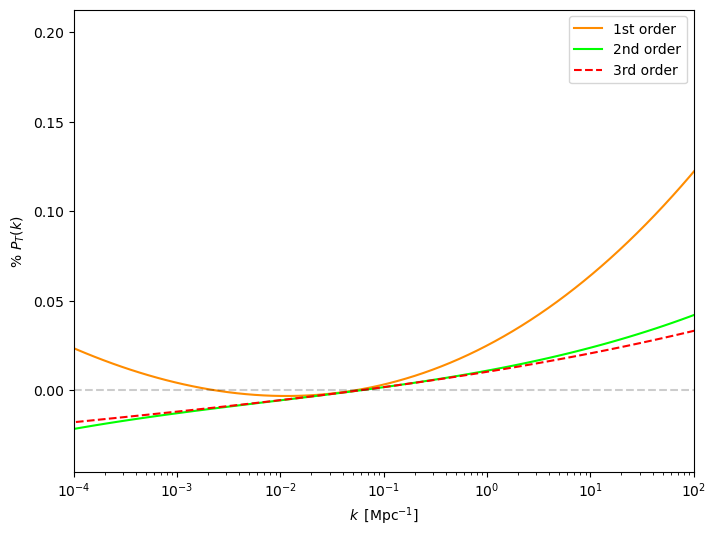

In [22]:
#Tensor PPS percentage errors

plt.figure(figsize=(8,6))
plt.plot(k_win, error_t1,color="darkorange", label = "1st order")
plt.plot(k_win, error_t2,color="lime",label = "2nd order")
plt.plot(k_win, error_t3,color="red",ls="--",label = "3rd order")
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
plt.xscale('log')
plt.xlim([10**(-4), 1e2])
plt.ylabel(r' % $P_T(k)$  ')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("Error_tensor_PSS.pdf", format="pdf", dpi=400)

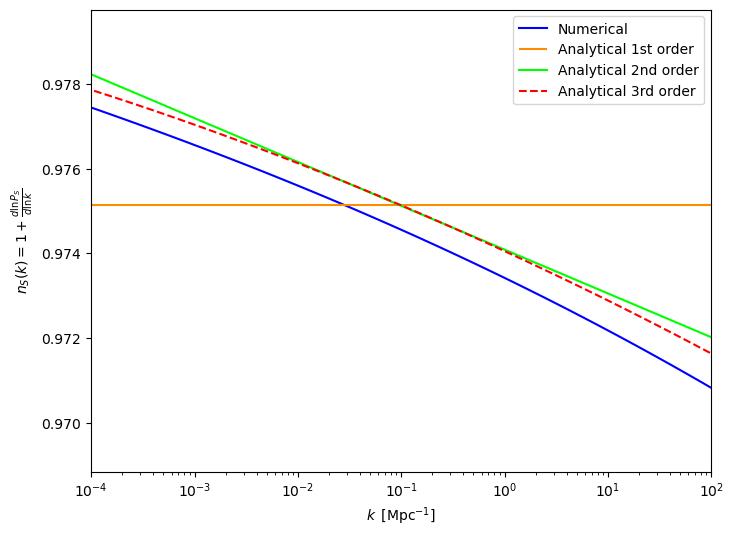

In [23]:
#n_S comparisons

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, n_S_fitted,color="blue", label="Numerical")
plt.hlines(y = 1+bs11(deltaN_star),xmin= k_win[0], xmax=k_win[93] , color = 'darkorange', label = 'Analytical 1st order', ls="-")
ax.plot(k_win, n_s2_ana(k_win),color="lime",label="Analytical 2nd order" )
ax.plot(k_win, n_s3_ana(k_win),color="red", ls="--", label="Analytical 3rd order")
ax.set_xscale('log')
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'$n_S(k) =1+\frac{d\ln P_S}{d \ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("ns_comparisons.pdf", format="pdf", dpi=400)

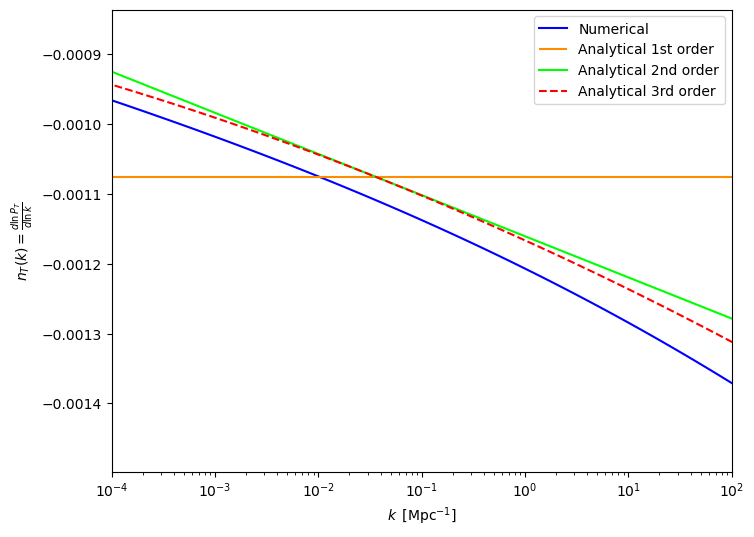

In [24]:
#n_T comparisons

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, n_T_fitted,color="blue", label="Numerical")
plt.hlines(y = bt11(deltaN_star),xmin= k_win[0], xmax=k_win[93] , color = 'darkorange', label = 'Analytical 1st order', ls="-")
ax.plot(k_win, n_t2_ana(k_win),color="lime",label="Analytical 2nd order" )
ax.plot(k_win, n_t3_ana(k_win),color="red", ls="--", label="Analytical 3rd order")
ax.set_xscale('log')
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'$n_T(k) =\frac{d\ln P_T}{d \ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("nt_comparisons.pdf", format="pdf", dpi=400)

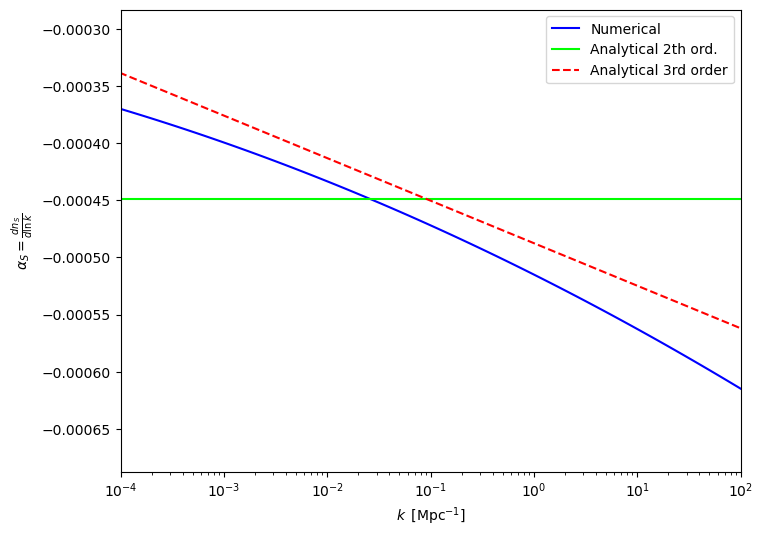

In [25]:
#alpha_S comparisons

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, alpha_S_fitted, color="blue", label= "Numerical")
ax.axhline(bs22(deltaN_star), xmin=k_win[0], xmax=k_win[69], color = "lime", ls="-", label= "Analytical 2th ord.")
ax.plot(k_win, alpha_s3_ana(k_win),color="red",ls="--", label= "Analytical 3rd order")
ax.set_xlim([1e-4,1e2])
ax.set_xscale('log')
plt.ylabel(r'$\alpha_S =\frac{dn_S}{d\ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
ax.legend()
#plt.savefig("alpha_S_comparisons.pdf", format="pdf", dpi=400)

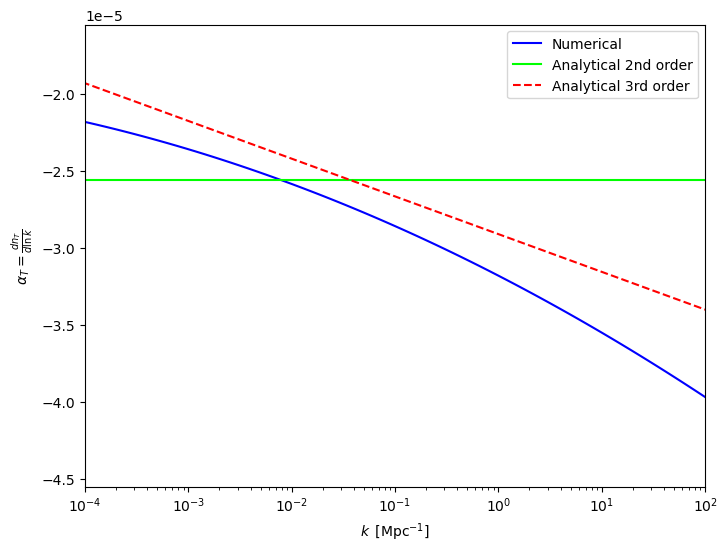

In [26]:
#alpha_T comparisons

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, alpha_T_fitted, color="blue", label= "Numerical")
ax.axhline(bt22(deltaN_star), xmin=k_win[0], xmax=k_win[69], color = "lime", ls="-", label= "Analytical 2nd order")
ax.plot(k_win, alpha_t3_ana(k_win),color="red",ls="--", label= "Analytical 3rd order")
ax.set_xlim([1e-4,1e2])
ax.set_xscale('log')
plt.ylabel(r'$\alpha_T=\frac{dn_T}{d\ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
ax.legend()
#plt.savefig("alpha_T_comparisons.pdf", format="pdf", dpi=400)

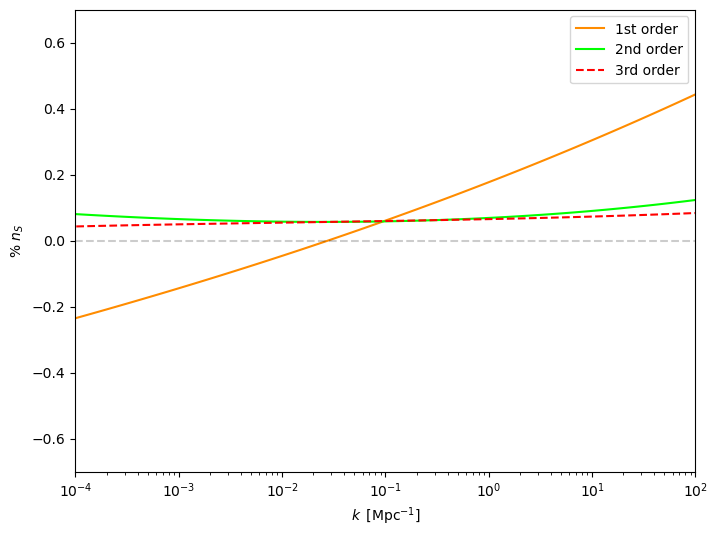

In [27]:
#n_S percentage errors

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_nS_1_fit, color="darkorange",label="1st order")
ax.plot(k_win, ratio_nS_2_fit,color="lime",label="2nd order" )
ax.plot(k_win, ratio_nS_3_fit,color="red",ls="--",label="3rd order" )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-0.7,0.7])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'% $ n_S$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("n_S_errors.pdf", format="pdf", dpi=400)

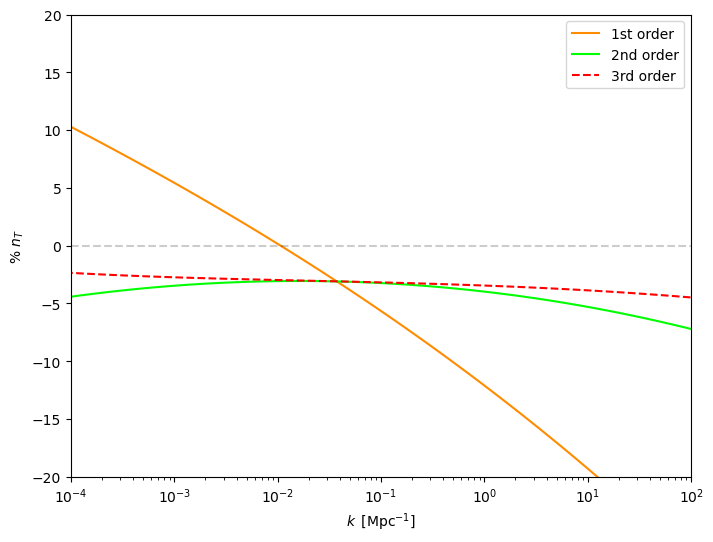

In [28]:
#n_T percentage errors

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_nT_1_fit, color="darkorange",label="1st order")
ax.plot(k_win, ratio_nT_2_fit, color="lime",label="2nd order" )
ax.plot(k_win, ratio_nT_3_fit, color="red",ls="--",label="3rd order" )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-20,20])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'% $ n_T$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("n_T_errors.pdf", format="pdf", dpi=400)

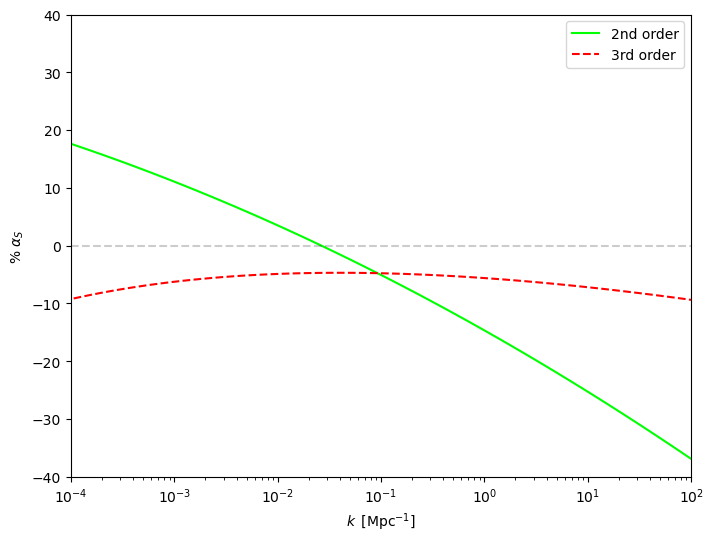

In [29]:
#alpha_S percentage errors 

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_alphaS_2_fit,color="lime",label="2nd order" )
ax.plot(k_win, ratio_alphaS_3_fit,color="red",ls="--",label="3rd order" )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-40,40])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'% $ \alpha_S$ ')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("alpha_S_errors.pdf", format="pdf", dpi=400)

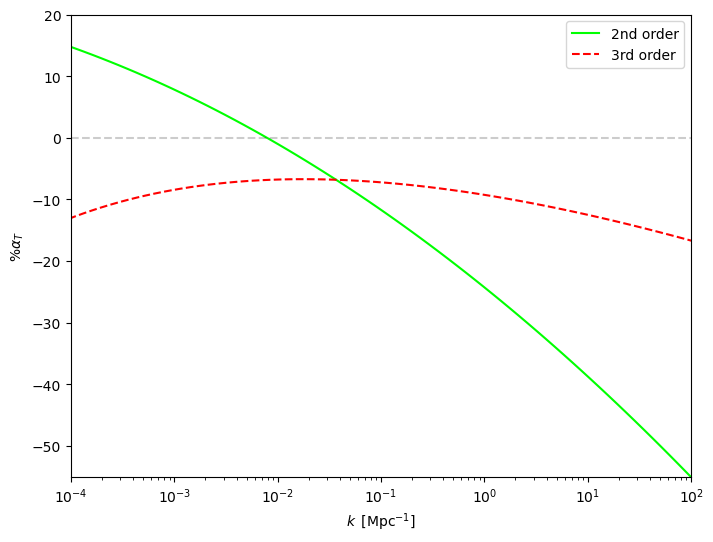

In [30]:
#alpha_T percentage errors 


fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_alphaT_2_fit,color="lime",label="2nd order" )
ax.plot(k_win, ratio_alphaT_3_fit,color="red",ls="--",label="3rd order" )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-55,20])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'%$ \alpha_T$ ')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("alpha_T_errors.pdf", format="pdf", dpi=400)

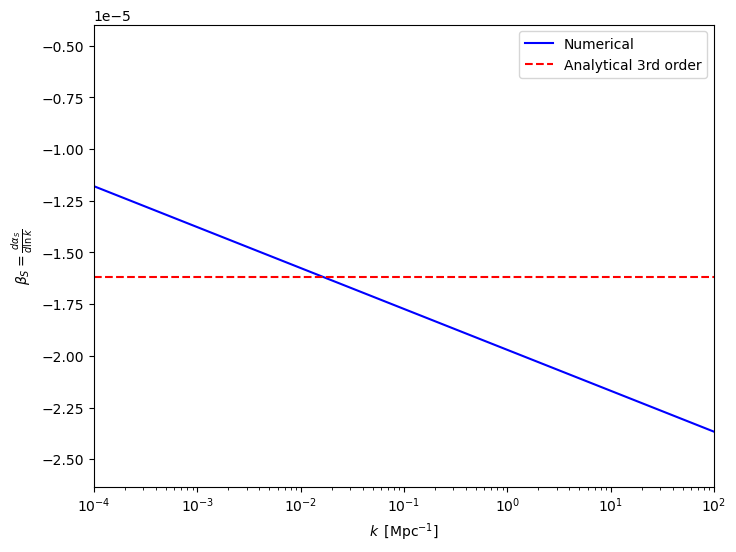

In [31]:
#beta_S comparisons 

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, beta_S_fitted, color="blue", label= "Numerical")
ax.axhline(bs33(deltaN_star), xmin=k_win[0], xmax=k_win[69], color = "red", ls="--", label= "Analytical 3rd order")
ax.set_xscale('log')
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'$\beta_S=\frac{d\alpha_S}{d\ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
ax.legend()
#plt.savefig("beta_S_comparisons.pdf", format="pdf", dpi=400)

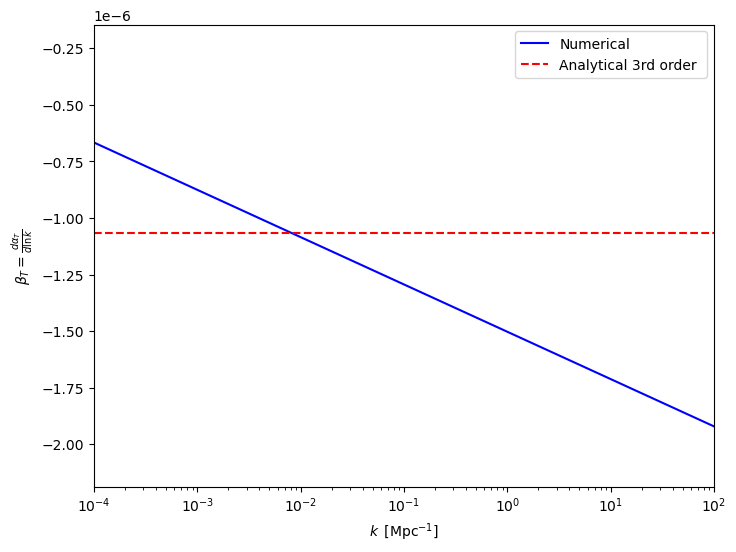

In [32]:
#beta_T comparisons 

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, beta_T_fitted, color="blue", label= "Numerical")
ax.axhline(bt33(deltaN_star), xmin=k_win[0], xmax=k_win[69], color = "red", ls="--", label= "Analytical 3rd order ")
ax.set_xscale('log')
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'$\beta_T=\frac{d\alpha_T}{d\ln k}$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
ax.legend()
#plt.savefig("beta_T_comparisons.pdf", format="pdf", dpi=400)

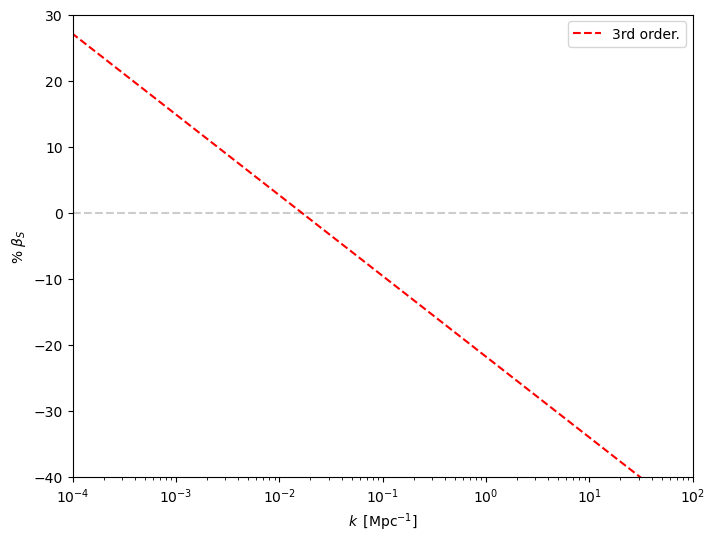

In [33]:
#beta_S percentage error

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_betaS,color="red",ls="--",label="3rd order." )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-40,30])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'% $ \beta_S$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("beta_S_error.pdf", format="pdf", dpi=400)

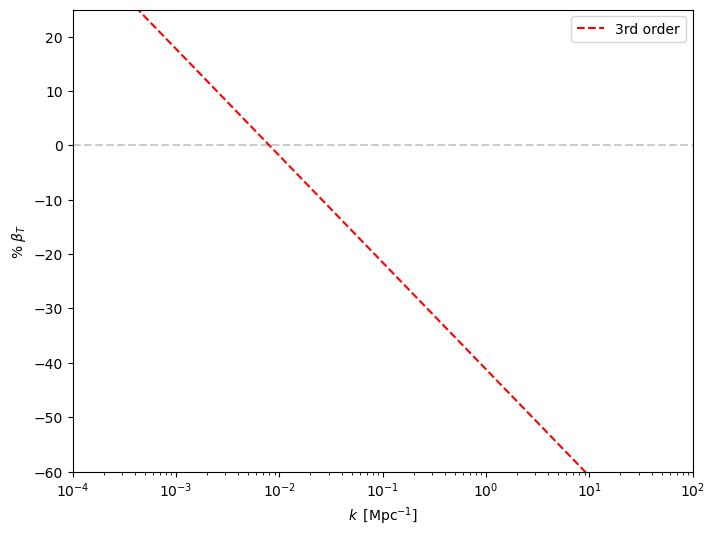

In [34]:
#beta_T percentage error

fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(k_win, ratio_betaT,color="red",ls="--",label="3rd order" )
plt.hlines(y = 0,xmin= 10**(-4), xmax=1e2 , color = 'k', ls="--",alpha=0.2)
ax.set_xscale('log')
ax.set_ylim([-60,25])
ax.set_xlim([1e-4,1e2])
plt.ylabel(r'% $ \beta_T$')
plt.xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
plt.legend()
#plt.savefig("beta_T_error.pdf", format="pdf", dpi=400)

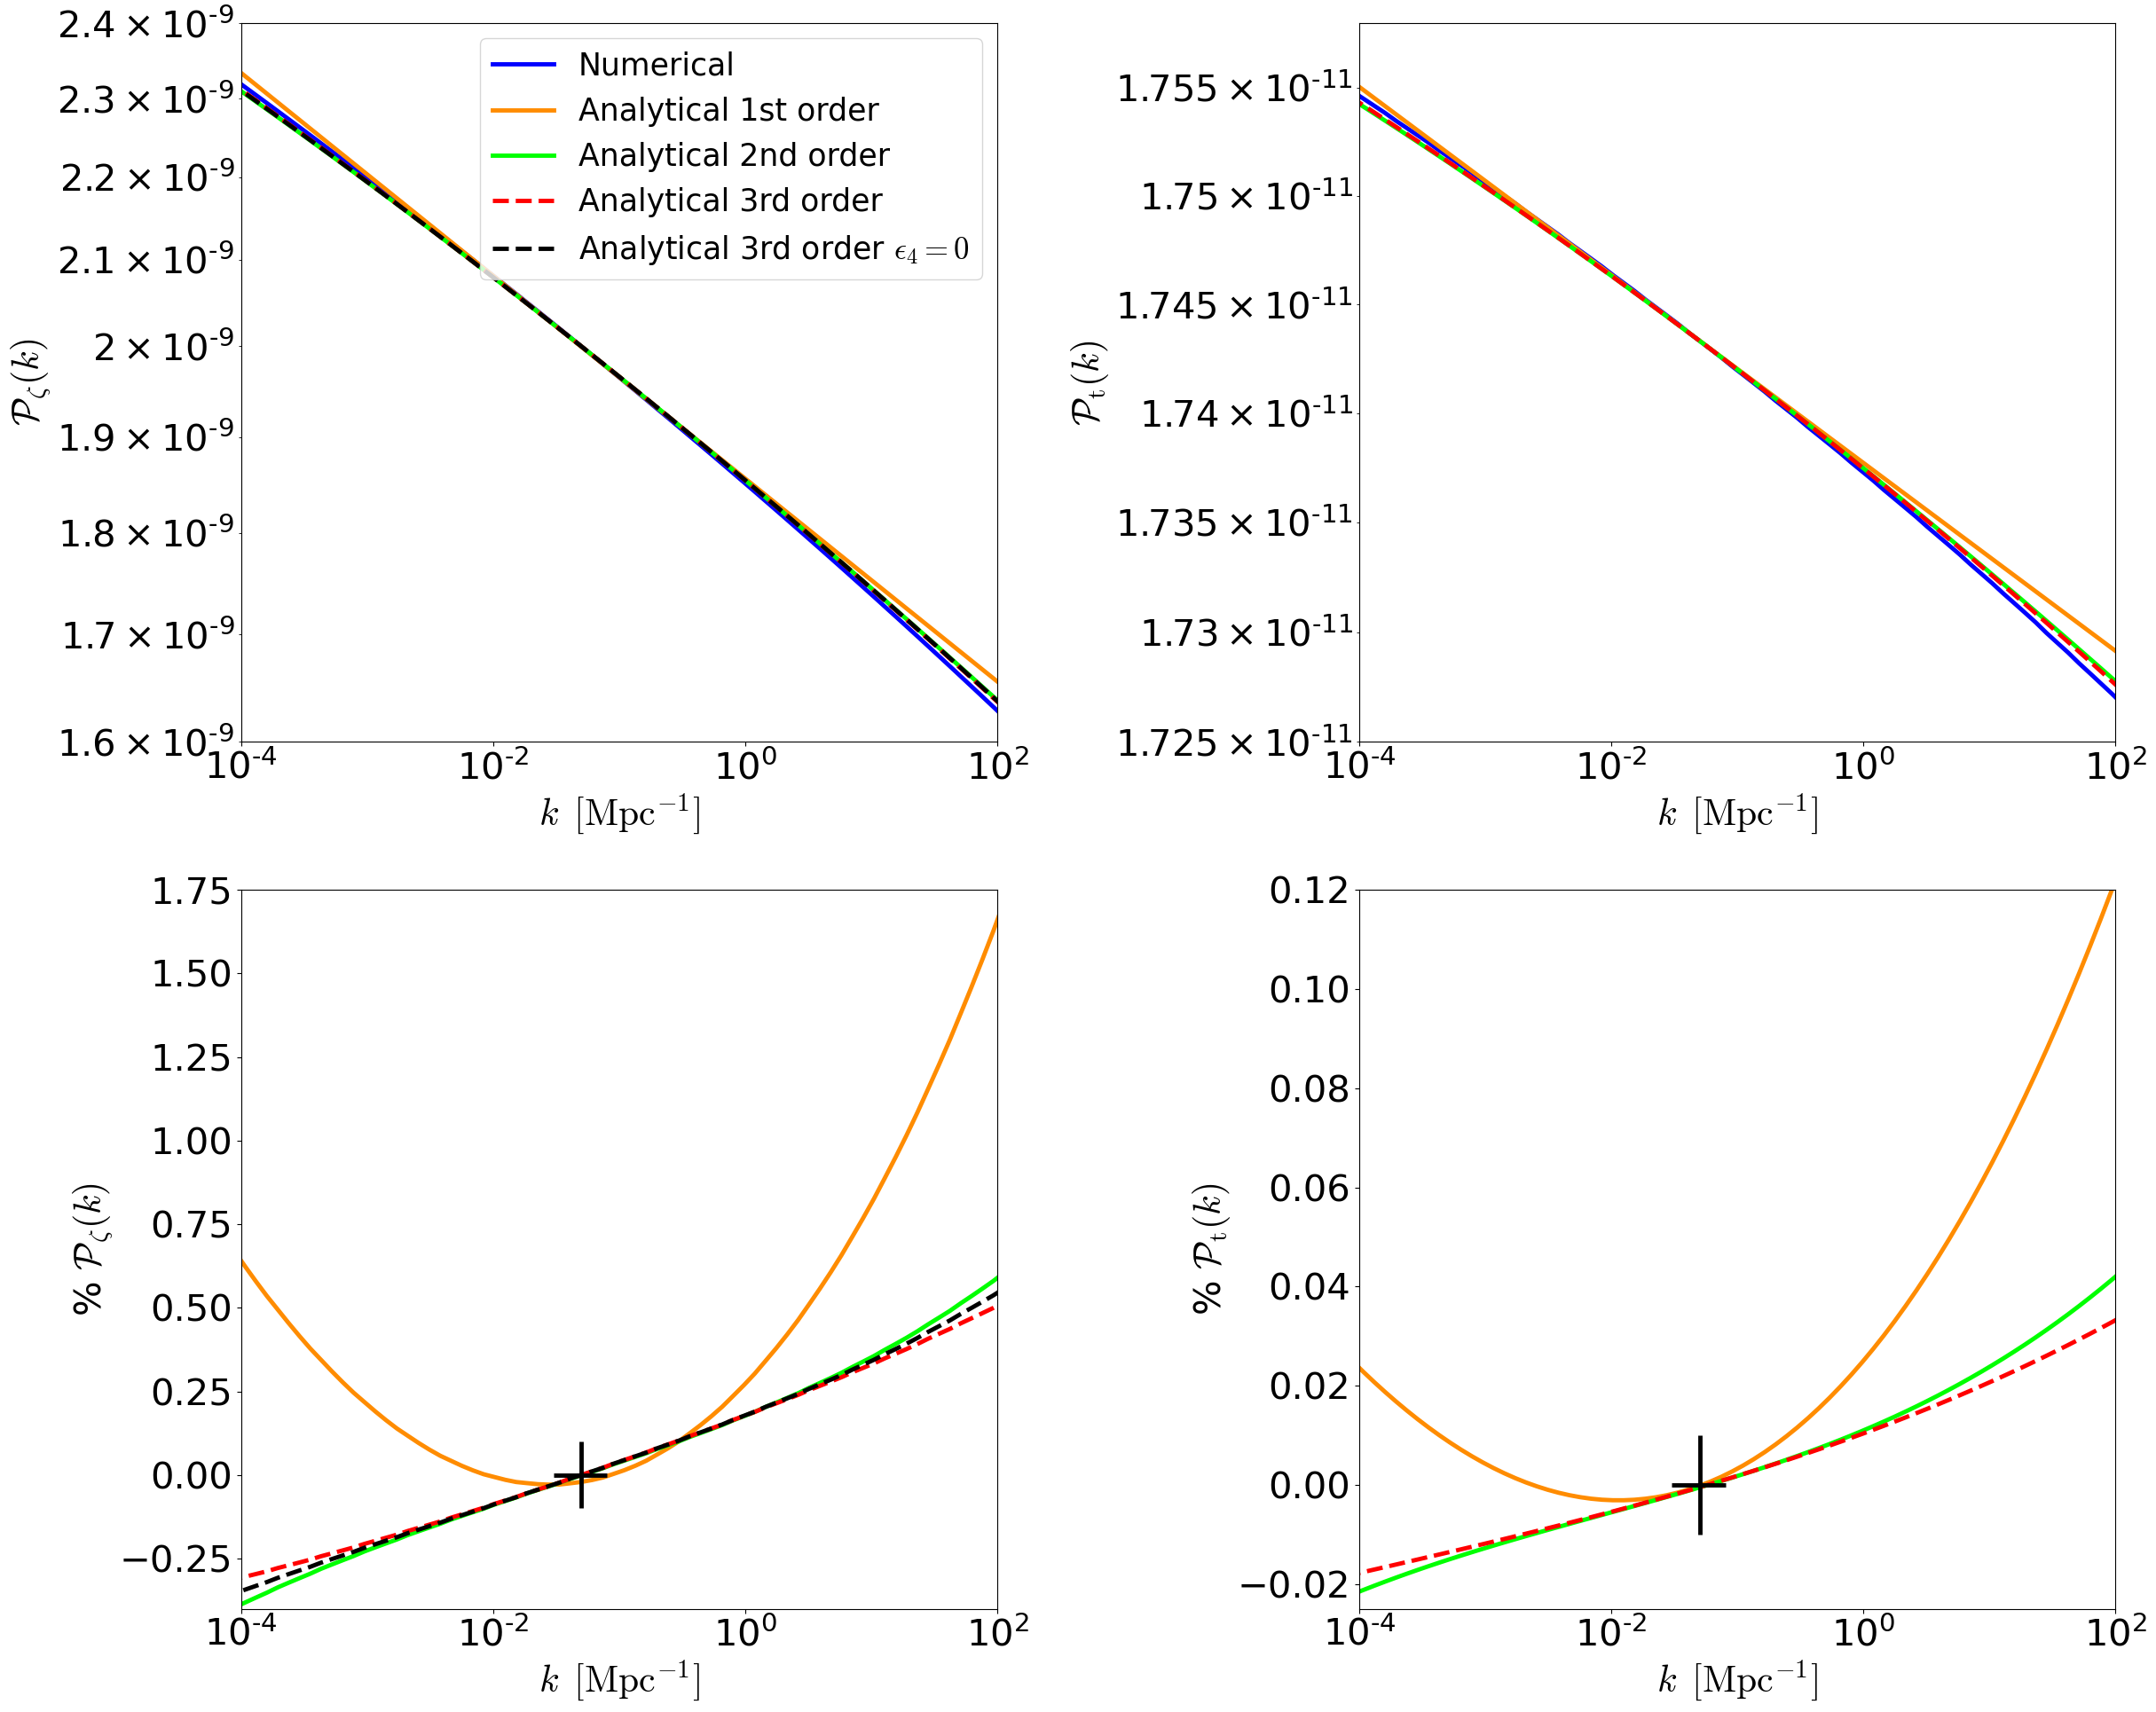

In [38]:
#PPS table plots

# Setting the font sizes
plt.rcParams["mathtext.fontset"] = "cm" #To obtain the legend in LateX
SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

#Dimensions
plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=BIGGER_SIZE)     
plt.rc('axes', labelsize=BIGGER_SIZE)     
plt.rc('xtick', labelsize=BIGGER_SIZE)    
plt.rc('ytick', labelsize=BIGGER_SIZE)    
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)   


fig, axs = plt.subplots(2, 2, figsize=(25,20))

# I plot (up left)
axs[0, 0].loglog(k_win, PSs_interp_num(k_win), color="blue", label="Numerical", linewidth=3.5)
axs[0, 0].loglog(k_win, loggPS_s1(k_win), color="darkorange", label="Analytical 1st order", linewidth=3.5)
axs[0, 0].loglog(k_win, loggPS_s2(k_win), color="lime", label="Analytical 2nd order", linewidth=3.5)
axs[0, 0].loglog(k_win, loggPS_s3(k_win), color="red", ls="--", label="Analytical 3rd order", linewidth=3.5)
axs[0, 0].loglog(k_win, loggPS_s3_noeps4(k_win), color="k", ls="--", label="Analytical 3rd order $\epsilon_4=0$",linewidth=3.5)
axs[0, 0].set_ylim([1.6e-9, 2.4e-9])
axs[0, 0].set_xlim([10**(-4), 1e2])
axs[0, 0].legend(loc='upper right')
axs[0, 0].set_ylabel(r'${\cal P}_{\zeta}(k)$')
axs[0, 0].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')

# II plot (up right)
axs[0, 1].loglog(k_win, PSt_interp_num(k_win), color="blue", label='Numerical', linewidth=3.5)
axs[0, 1].loglog(k_win, loggPS_t1(k_win), color="darkorange", label="Analytical 1st order", linewidth=3.5)
axs[0, 1].loglog(k_win, loggPS_t2(k_win), color="lime", label="Analytical 2nd order", linewidth=3.5)
axs[0, 1].loglog(k_win, loggPS_t3(k_win), color="red", ls="--", label="Analytical 3rd order", linewidth=3.5)
axs[0, 1].set_ylim([1.725e-11, 1.758e-11])
axs[0, 1].set_xlim([10**(-4), 1e2])
axs[0, 1].set_ylabel(r'${\cal P}_{\rm t}(k)$')
axs[0, 1].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')

# Third plot (down left)
axs[1, 0].plot(k_win, error_s1, color="darkorange", label="1st order", linewidth=3.5)
axs[1, 0].plot(k_win, error_s2, color="lime", label="2nd order", linewidth=3.5)
axs[1, 0].plot(k_win, error_s3, color="red", ls="--", label="3rd order", linewidth=3.5)
axs[1, 0].plot(k_win, error_s3_noeps4, color="k", ls="--", label=" 3rd order $\epsilon_4=0$",linewidth=3.5)
axs[1, 0].vlines(x=k_star, ymin=-0.1, ymax=0.1, color='k', ls="-", linewidth=3.5 ,label="$k_*$")
axs[1, 0].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1, linewidth=3.5)
axs[1, 0].set_xscale('log')
axs[1, 0].set_ylim([-0.4, +1.75])
axs[1, 0].set_xlim([10**(-4), 1e2])
axs[1, 0].set_ylabel(r'% ${\cal P}_\zeta(k)$')
axs[1, 0].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')

# Fourth plot (down right)
axs[1, 1].plot(k_win, error_t1, color="darkorange", label="1st order", linewidth=3.5)
axs[1, 1].plot(k_win, error_t2, color="lime", label="2nd order", linewidth=3.5)
axs[1, 1].plot(k_win, error_t3, color="red", ls="--", label="3rd order", linewidth=3.5)
axs[1, 1].vlines(x=k_star, ymin=-0.01, ymax=0.01, color='k', ls="-", linewidth=3.5 ,label="$k_*$")
axs[1, 1].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1, linewidth=3.5)
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylim([-0.025, 0.12])
axs[1, 1].set_xlim([10**(-4), 1e2])
axs[1, 1].set_ylabel(r'% ${\cal P}_{\rm t}(k)$')
axs[1, 1].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')

plt.tight_layout()
plt.savefig("KKLT_plots1_eps40.pdf", format="pdf", dpi=400)
plt.show()


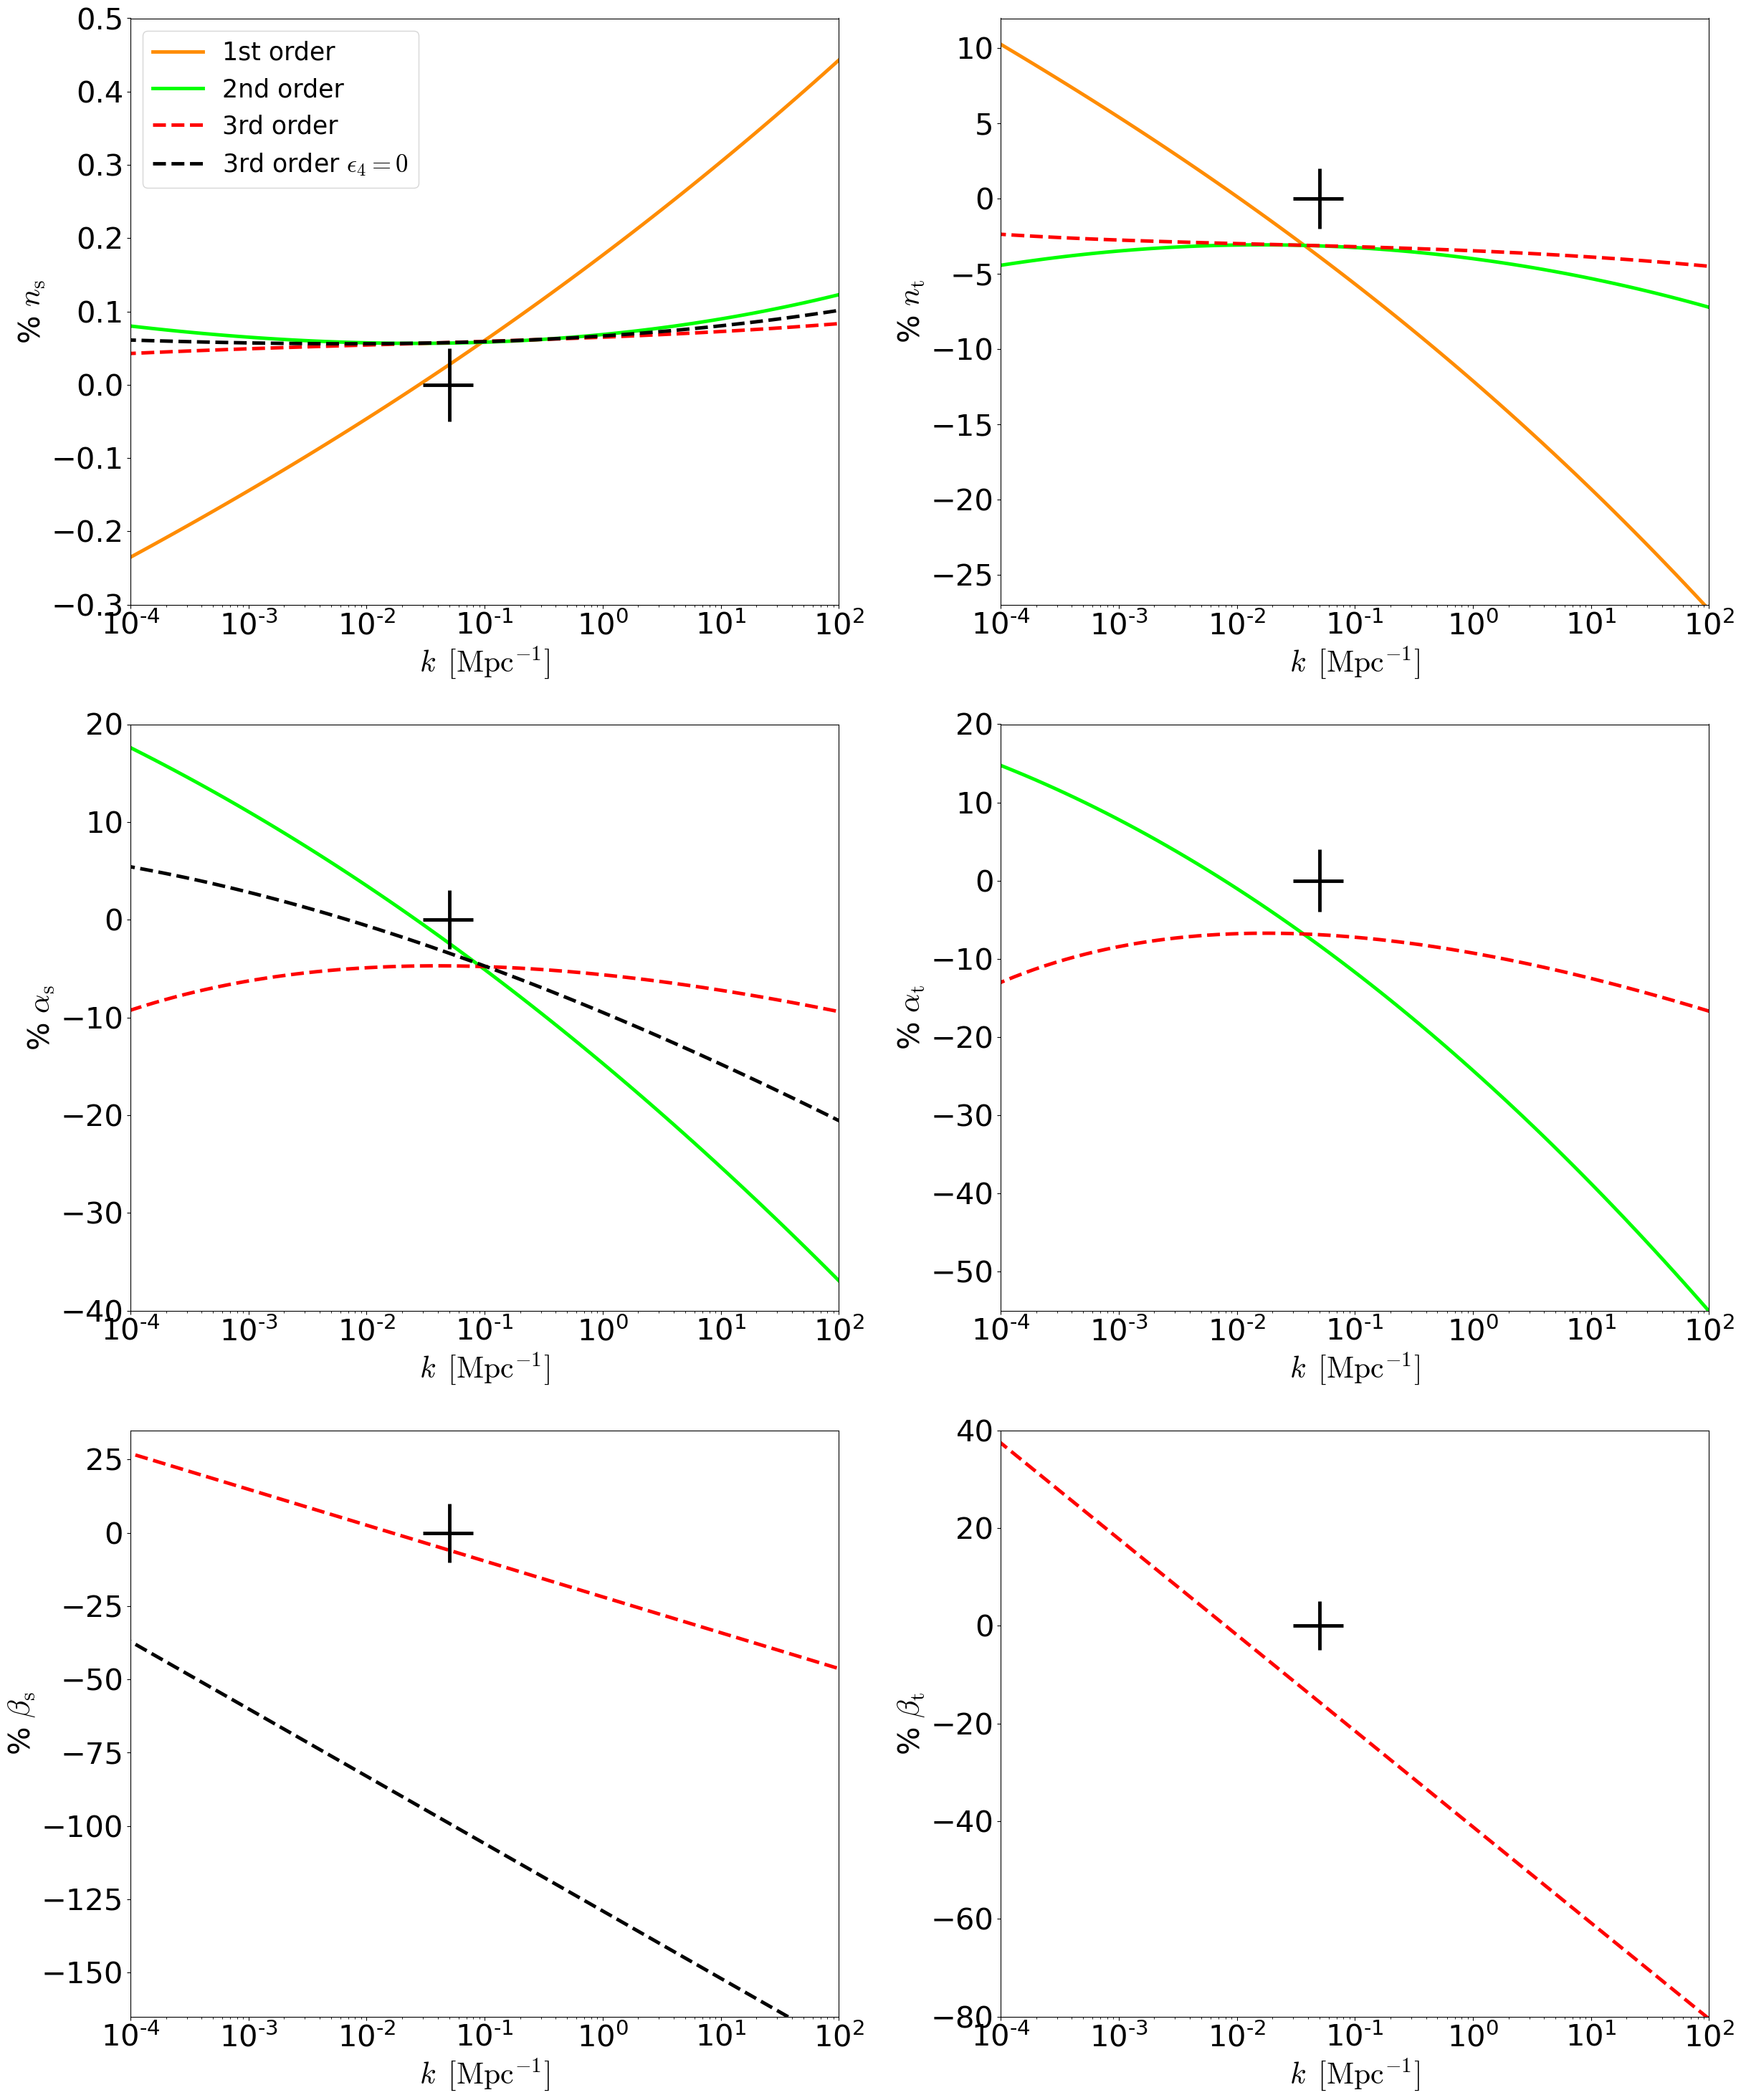

In [40]:
#Spectral indices, runnings, and runnings of the runnings table plots

# Setting the font sizes
fig, axs = plt.subplots(3, 2, figsize=(25,30))

SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

#Dimensions
plt.rc('font', size=BIGGER_SIZE)         
plt.rc('axes', titlesize=BIGGER_SIZE)    
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rc('xtick', labelsize=BIGGER_SIZE)   
plt.rc('ytick', labelsize=BIGGER_SIZE)   
plt.rc('legend', fontsize=MEDIUM_SIZE)   
plt.rc('figure', titlesize=BIGGER_SIZE) 

axs[0, 0].plot(k_win, ratio_nS_1_fit, color="darkorange", label="1st order",linewidth=3.5)
axs[0, 0].plot(k_win, ratio_nS_2_fit, color="lime", label="2nd order",linewidth=3.5)
axs[0, 0].plot(k_win, ratio_nS_3_fit, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[0, 0].plot(k_win, ratio_nS_3_fit_noeps4, color="k", ls="--", label="3rd order $\epsilon_4=0$",linewidth=3.5)
axs[0, 0].vlines(x=k_star, ymin=-0.05, ymax=0.05, color='k', ls="-",linewidth=3.5 )
axs[0, 0].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[0, 0].set_xscale('log')
axs[0, 0].set_ylim([-0.3, 0.5])
axs[0, 0].set_xlim([1e-4, 1e2])
axs[0, 0].set_ylabel(r'% $n_{\rm s}$')
axs[0, 0].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
axs[0, 0].legend()

axs[0, 1].plot(k_win, ratio_nT_1_fit, color="darkorange", label="1st order",linewidth=3.5)
axs[0, 1].plot(k_win, ratio_nT_2_fit, color="lime", label="2nd order",linewidth=3.5)
axs[0, 1].plot(k_win, ratio_nT_3_fit, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[0, 1].vlines(x=k_star, ymin=-2, ymax=2, color='k', ls="-",linewidth=3.5 )
axs[0, 1].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[0, 1].set_xscale('log')
axs[0, 1].set_ylim([-27, 12])
axs[0, 1].set_xlim([1e-4, 1e2])
axs[0, 1].set_ylabel(r'% $n_{\rm t}$')
axs[0, 1].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#axs[0, 1].legend()

axs[1, 0].plot(k_win, ratio_alphaS_2_fit, color="lime", label="2nd order",linewidth=3.5)
axs[1, 0].plot(k_win, ratio_alphaS_3_fit, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[1, 0].plot(k_win, ratio_alphaS_3_fit_noeps4, color="k", ls="--", label="3rd order $\epsilon_4=0$",linewidth=3.5)
axs[1, 0].vlines(x=k_star, ymin=-3, ymax=3, color='k', ls="-",linewidth=3.5 )
axs[1, 0].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[1, 0].set_xscale('log')
axs[1, 0].set_ylim([-40, 20])
axs[1, 0].set_xlim([1e-4, 1e2])
axs[1, 0].set_ylabel(r'% $\alpha_{\rm s}$')
axs[1, 0].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#axs[1, 0].legend()

axs[1, 1].plot(k_win, ratio_alphaT_2_fit, color="lime", label="2nd order",linewidth=3.5)
axs[1, 1].plot(k_win, ratio_alphaT_3_fit, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[1, 1].vlines(x=k_star, ymin=-4, ymax=4, color='k', ls="-",linewidth=3.5 )
axs[1, 1].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylim([-55, 20])
axs[1, 1].set_xlim([1e-4, 1e2])
axs[1, 1].set_ylabel(r'% $\alpha_{\rm t}$')
axs[1, 1].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#axs[1, 1].legend()

axs[2, 0].plot(k_win, ratio_betaS, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[2, 0].plot(k_win, ratio_betaS_noeps4, color="k", ls="--", label="3rd order $\epsilon_4=0$",linewidth=3.5)
axs[2, 0].vlines(x=k_star, ymin=-10, ymax=10, color='k', ls="-",linewidth=3.5 )
axs[2, 0].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[2, 0].set_xscale('log')
axs[2, 0].set_ylim([-165, 35])
axs[2, 0].set_xlim([1e-4, 1e2])
axs[2, 0].set_ylabel(r'% $\beta_{\rm s}$')
axs[2, 0].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#axs[2, 0].legend()


axs[2, 1].plot(k_win, ratio_betaT, color="red", ls="--", label="3rd order",linewidth=3.5)
axs[2, 1].vlines(x=k_star, ymin=-5, ymax=5, color='k', ls="-",linewidth=3.5 )
axs[2, 1].hlines(y=0, xmin=k_star-0.02, xmax=k_star+0.03, color='k', ls="-", alpha=1,linewidth=3.5)
axs[2, 1].set_xscale('log')
axs[2, 1].set_ylim([-80, 40])
axs[2, 1].set_xlim([1e-4, 1e2])
axs[2, 1].set_ylabel(r'% $\beta_{\rm t}$')
axs[2, 1].set_xlabel(r'$k\, \ [{\rm Mpc^{-1}}]$')
#axs[2, 1].legend()


plt.tight_layout()
plt.savefig("KKLT_plots2_eps40.pdf", format="pdf", dpi=400)
plt.show()
